## Heart disease

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import seaborn as sb
from PIL import Image
import cv2

In [2]:
df = pd.read_csv("Heart_Disease.csv")

The following table show the information about heart disease patients.

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


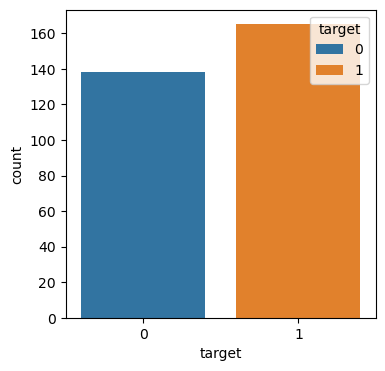

In [8]:
plt.figure(figsize = (4,4))
sb.countplot(x = df["target"], hue = df["target"])
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.shape

(303, 14)

## Data Analysis 

#### Examine Missing Value

In [11]:
# insull().sum() show total number of null value in dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

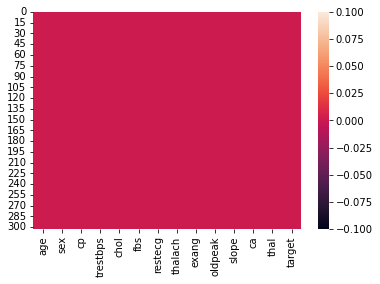

In [22]:
sb.heatmap(df.isnull())

In [19]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

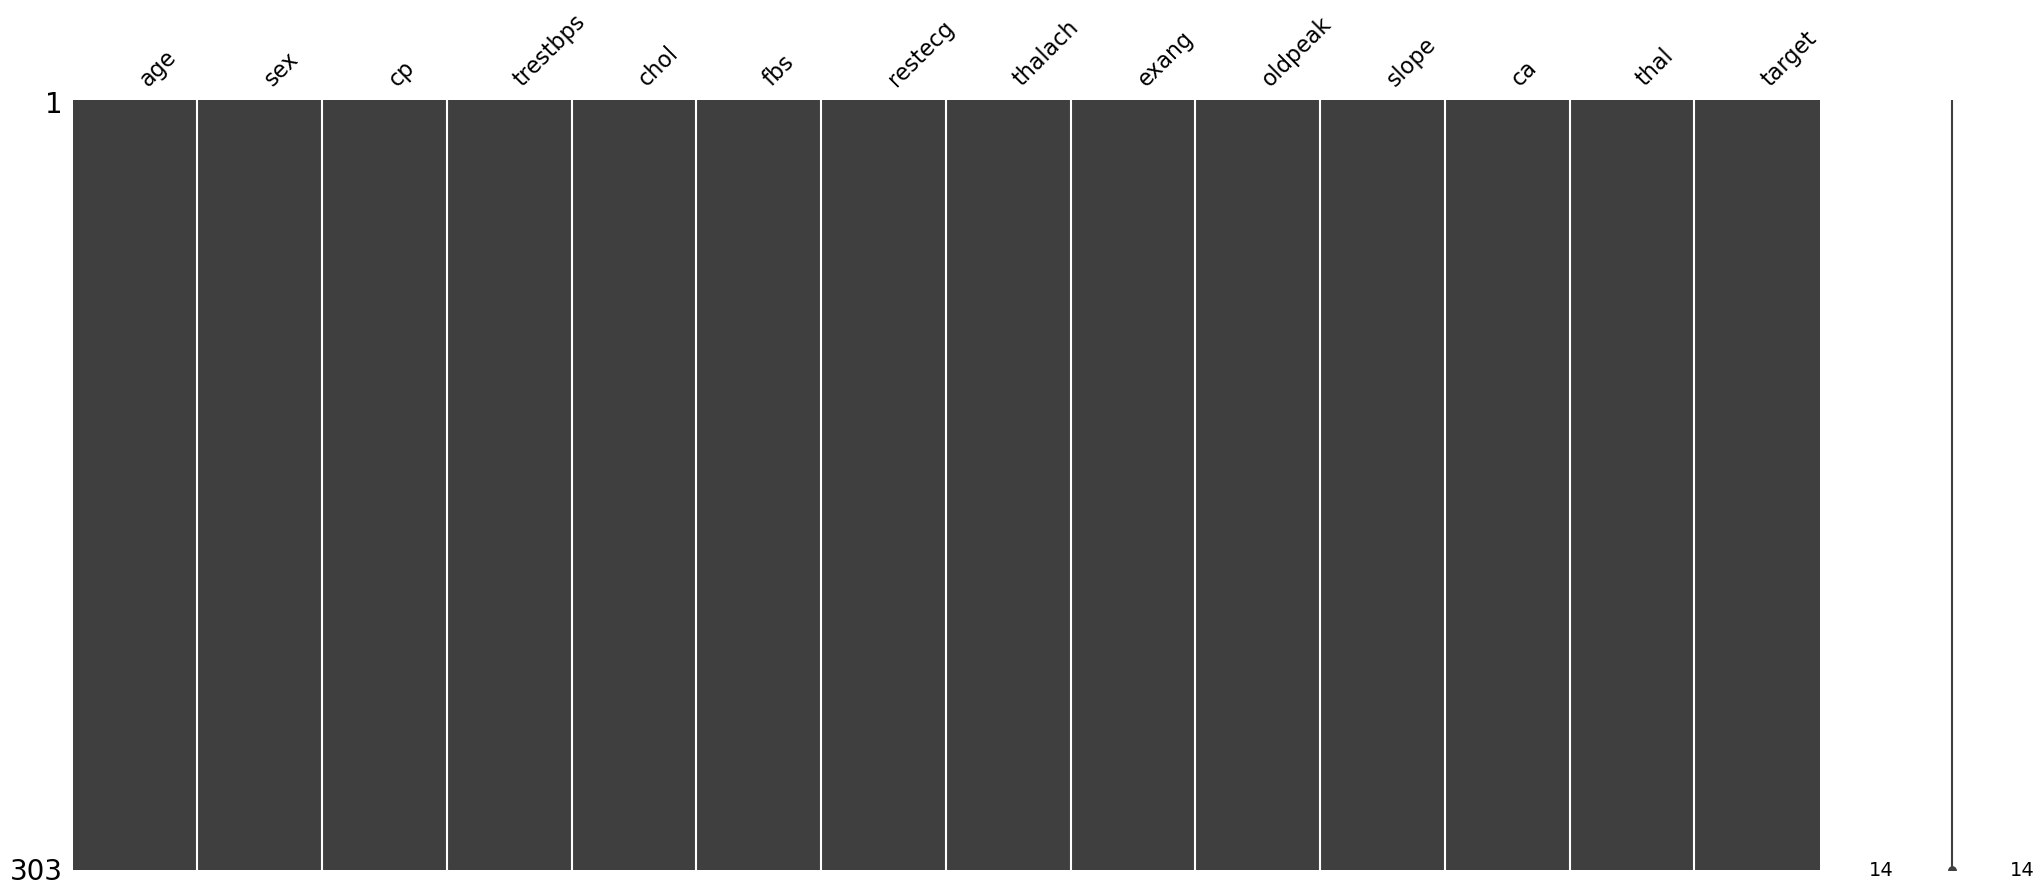

In [13]:
# Missingno libraries visualize missing data through bars
import missingno
missingno.matrix(df)

## Examining Unique Value

In [14]:
#This function show us no of unique value
df["age"].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [12]:
# This function show us total uniqe value in columns
df["age"].value_counts().count()

41

In [7]:
unique_value = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_value.append(x)

pd.DataFrame(unique_value, index = df.columns, columns = ["Total Unique value"])

,Total Unique value
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


### Seperating variable(Numeric and catagorical)

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Seperating variables (Numeric or categorical)

In [15]:
# Numeric varible are quantitative variables
numeric_var = ["age", "trestbps", "chol", "thalach", "oldpeak"]
# categorical varible are qualitative variables
categorical = ["sex", "cp", "fbs", "restecg", "exang", "slop", "ca", "thal", "target"]

### Examine statistical variable

In [40]:
df[numeric_var].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Visualize different varaible

#### Age

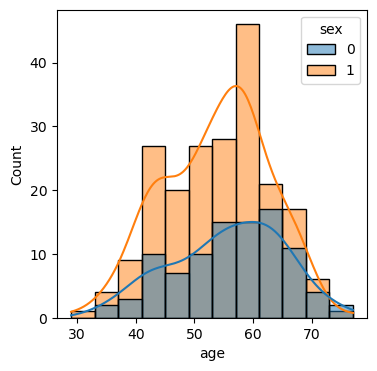

In [27]:
plt.figure(figsize = (4,4))
sb.histplot(x = df["age"], kde = True, hue = df["sex"])
plt.show()

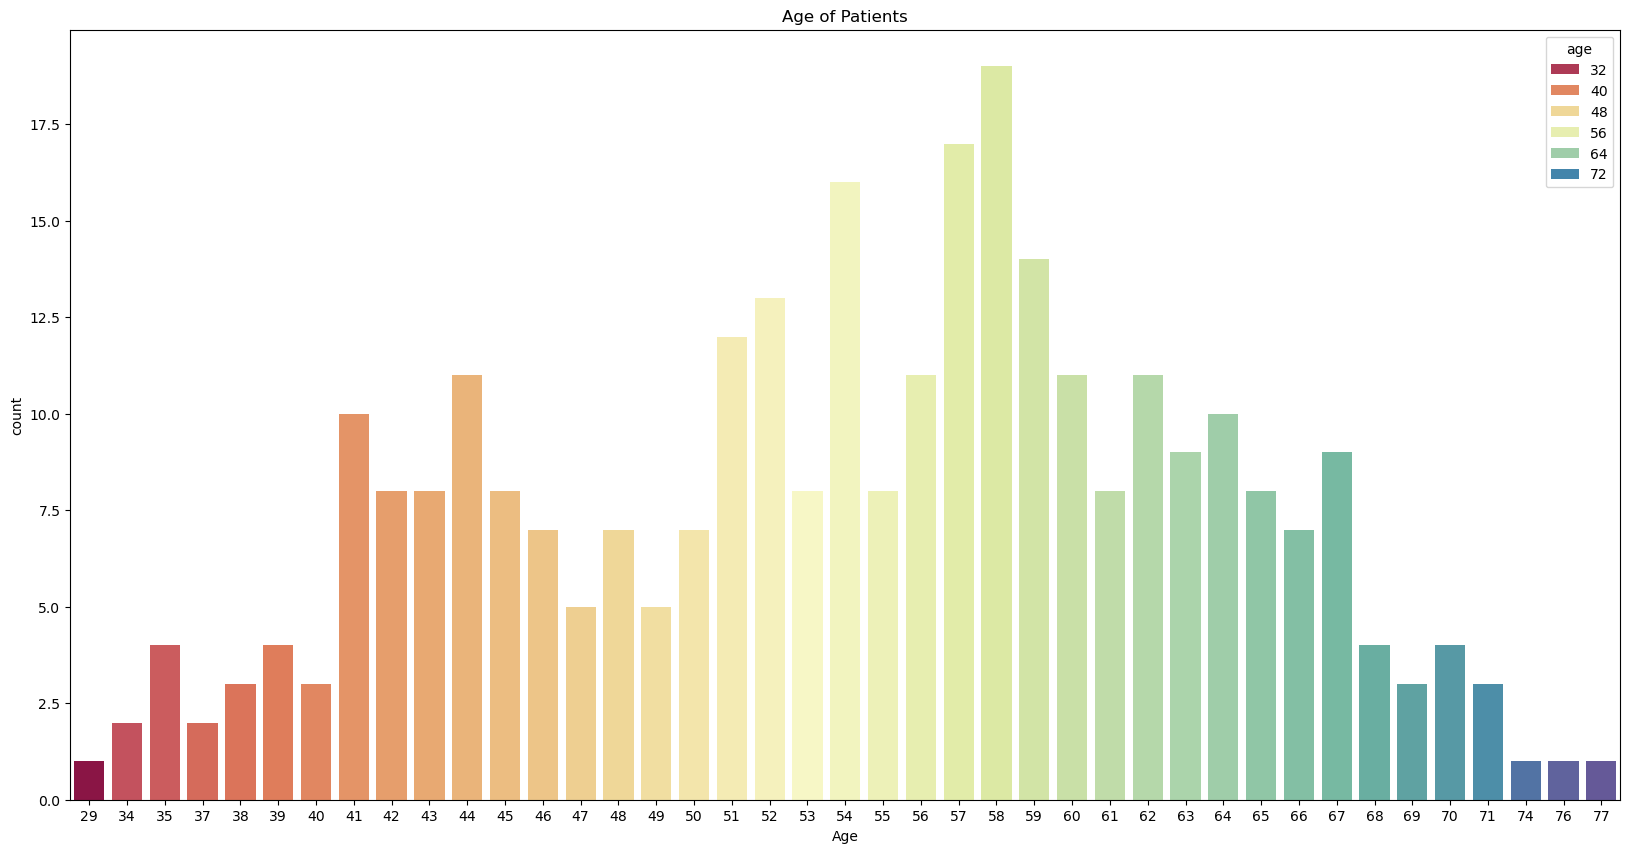

In [40]:
plt.figure(figsize=(20,10))
plt.title("Age of Patients")
plt.xlabel("Age")
sb.countplot(x = df["age"], hue = df["age"], palette = "Spectral")
plt.show()

#### Trestbps (Blood Pressure in mmg)

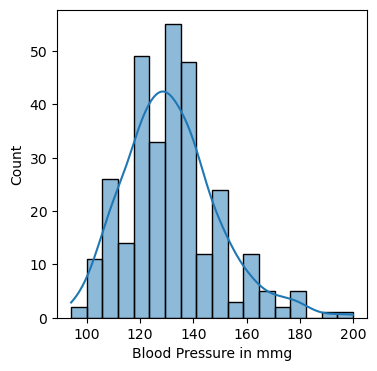

In [61]:
plt.figure(figsize = (4,4))
sb.histplot(x = df["trestbps"], kde = True)
plt.xlabel("Blood Pressure in mmg")
plt.show()

#### Cholestrol

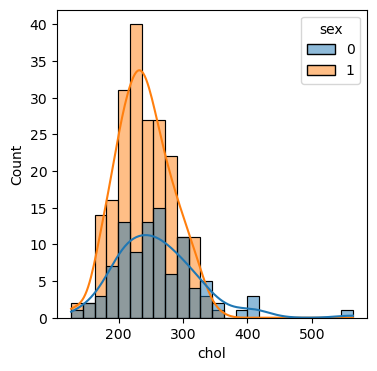

In [28]:
plt.figure(figsize = (4,4))
sb.histplot(x = df["chol"], kde = True, hue = df["sex"])
plt.show()

#### Sex

<Axes: title={'center': 'Sex of Patients , 0 = Female, 1 = Male'}, xlabel='sex', ylabel='count'>

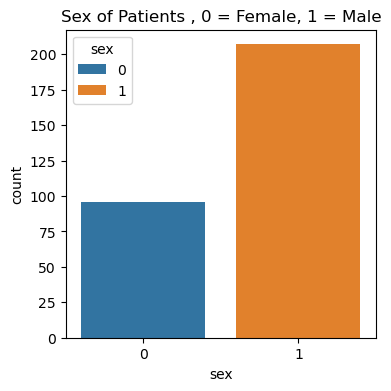

In [33]:
plt.figure(figsize=(4,4))
plt.title("Sex of Patients , 0 = Female, 1 = Male")
sb.countplot(x = df["sex"], hue = df["sex"] )

#### CP

In [43]:
cp = df["cp"].value_counts()
cp

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [46]:
cp = df["cp"].value_counts().reset_index()
cp

,cp,count
0,0,143
1,2,87
2,1,50
3,3,23


In [48]:
cp["cp"][3] = "Asypmtomatic"
cp["cp"][2] = "Non_Anginal"
cp["cp"][1] = "Atypical Anigma"
cp["cp"][0] = "Typical Anigma"

C:\Users\Mohsin\AppData\Local\Temp\ipykernel_23768\719954445.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Asypmtomatic' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cp["cp"][3] = "Asypmtomatic"


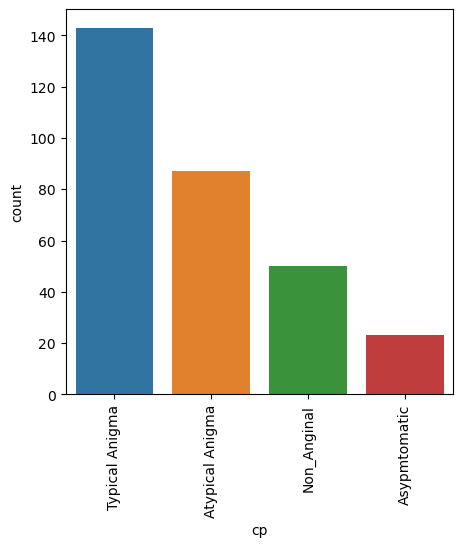

In [54]:
plt.figure(figsize=(5,5))
sb.barplot(x = cp["cp"], y = cp["count"], hue = cp["cp"])
plt.xticks(rotation = "vertical")
plt.show()

#### Pair Plot

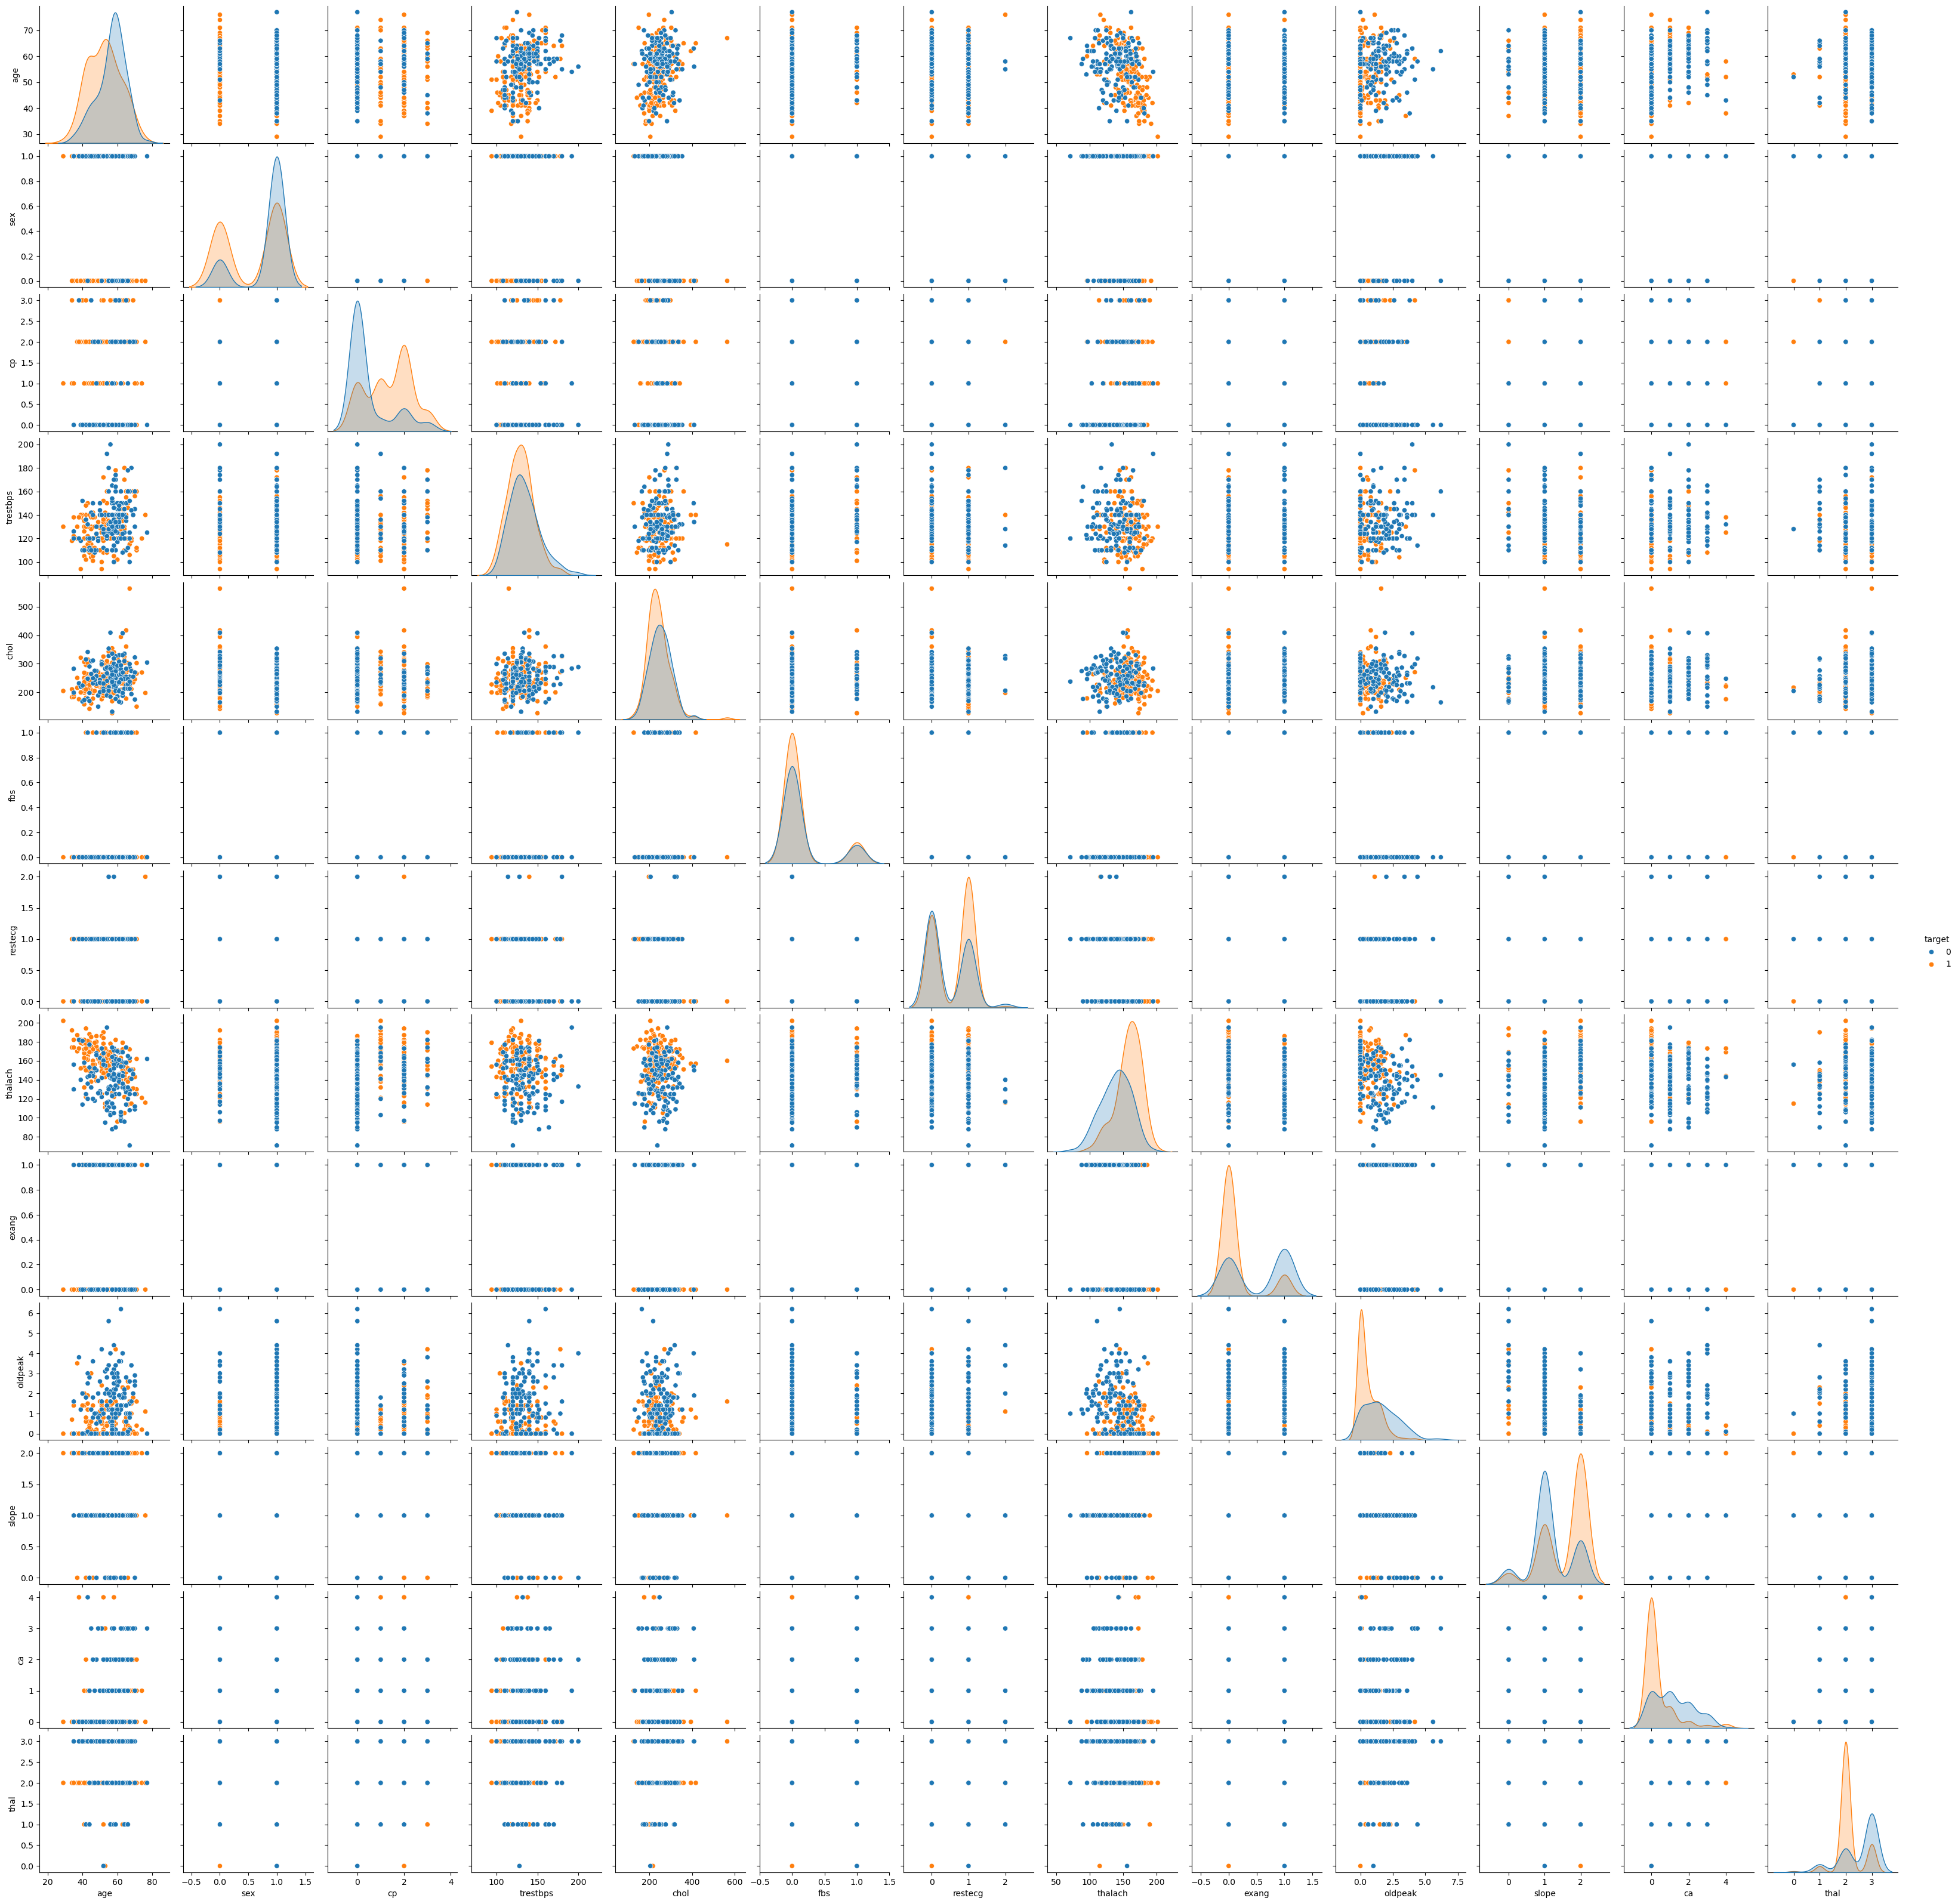

In [55]:
# hue are used as target variable or the output variable
sb.pairplot(df, hue = "target")

#### Correlation

In [29]:
df.corr().head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


<Axes: >

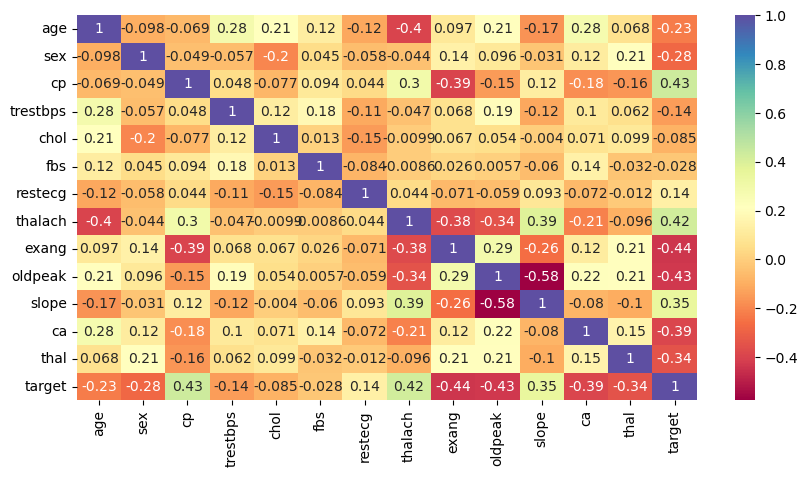

In [63]:
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(), annot = True, cmap = "Spectral")

## Preparation for Modeling

#### Dropping column with low correlation with Target var: In the above model we check the correlation. Then we drop the low correlation row with target variable row

In [67]:
df_copy = df.copy()

In [68]:
### The 'Chol' and 'fbs' is low relation with target variabe so we remove it
df_copy.drop(["chol","fbs"], axis = 1, inplace=True)
df_copy.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


## Outlier

#### Outliers are extreme values that differ from most other data points in a dataset. They can have a big impact on your statistical analyses and skew the results of any hypothesis tests.

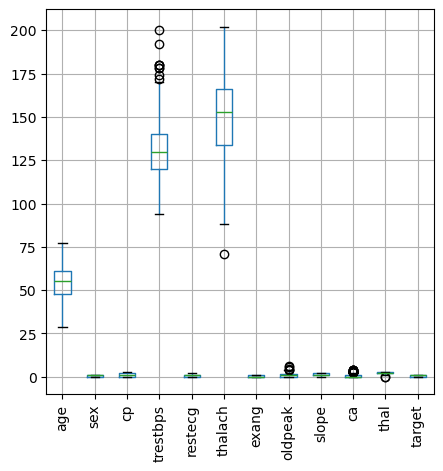

In [83]:
# Checking Outlier 
df_copy.boxplot(figsize =(5,5))
plt.xticks(rotation = "vertical")
plt.show()

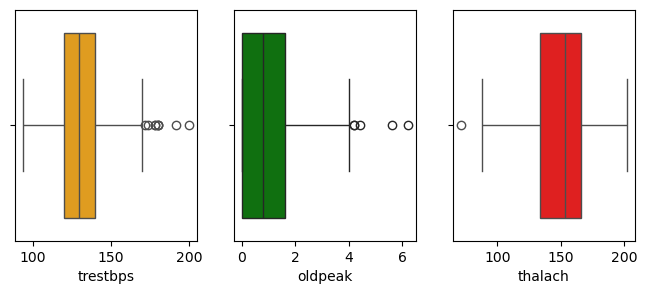

In [81]:
# The above Figure Show that their is oulier is three Parameter 'trestbps','oldpeak', 'thalach'
fig, axes = plt.subplots(1,3, figsize = (8,3))

sb.boxplot(ax = axes[0], x = df_copy["trestbps"], color = "orange")
sb.boxplot(ax = axes[1], x = df_copy["oldpeak"], color = "green")
sb.boxplot(ax = axes[2], x = df_copy["thalach"], color = "red")
plt.show()

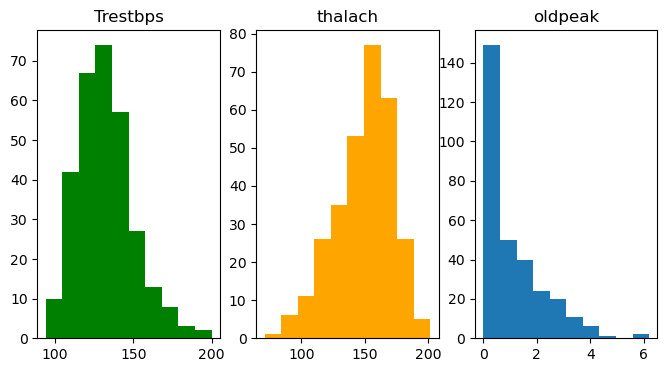

In [90]:
fig, (x1,x2, x3) = plt.subplots(1, 3, figsize = (8,4))


x1.hist([df.trestbps] , color = "green")
x1.set_title("Trestbps")

x2.hist([df.thalach], color = "orange")
x2.set_title("thalach")

x3.hist([df.oldpeak])
x3.set_title("oldpeak")

plt.show()


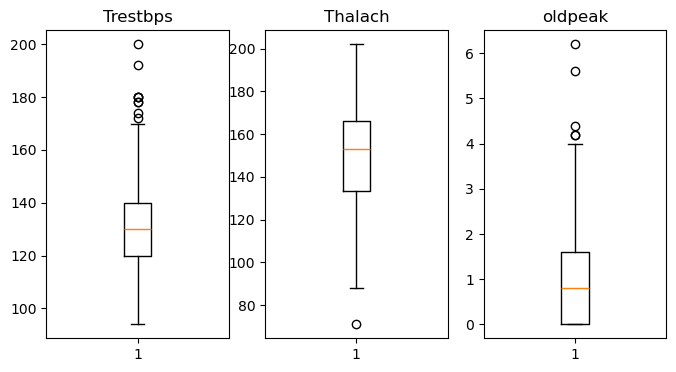

In [94]:
fig, (x2, x3, x4) = plt.subplots(1, 3, figsize = (8,4))

x2.boxplot([df.trestbps])
x2.set_title("Trestbps")

x3.boxplot([df.thalach])
x3.set_title("Thalach")

x4.boxplot([df.oldpeak])
x4.set_title("oldpeak")

plt.show()


### Removing Outlier:
There are three method to remove outlier from the dataset which are the following

1: Z_Score Method
2: IQR Method
3: Percentile Method

### 1: Z_Score Method :


The formula for calculating a z-score is z = (x-μ)/σ, where x is the raw score, μ is the population mean, and σ is the population standard deviation.

In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

In 1st standard deviation 1σ thre will be 68% values.

In 2nd standard deviation 2σ thre will be 95% values.

In 3rd standard deviation 3σ thre will be 99.7% value.


Now those value which are high than 3σ in possitive side and low than 3σ in negative side then it will be Outlier.

In [95]:
print("Mean value = ", df_copy["age"].mean())
print("Std value = ", df_copy["age"].std())
print("Min value = ", df_copy["age"].min())
print("Max value = ", df_copy["age"].max())

Mean value =  54.366336633663366
Std value =  9.082100989837858
Min value =  29
Max value =  77


In [96]:
# Finding highest allowed value and lowest allowed value from 3σ
print("highest allowed = ", df_copy["age"].mean()+3*df["age"].std())
print("lowest allowed = ", df_copy["age"].mean()-3*df["age"].std())

highest allowed =  81.61263960317694
lowest allowed =  27.12003366414979


In [97]:
#There is no outlier in age column
df_copy[(df_copy["age"] < 27) | (df_copy["age"] > 81)]

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [98]:
# Remove outlier from Testbps
print("highest value  = ", df_copy["trestbps"].mean()+3*df_copy["trestbps"].std())
print("lowest value  = ", df_copy["trestbps"].mean()-3*df_copy["trestbps"].std())

highest value  =  184.23819081678892
lowest value  =  79.00933393568636


In [99]:
df_copy[(df_copy["trestbps"] < 79) | (df_copy["trestbps"] > 184)]

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,0,133,1,4.0,0,2,3,0
248,54,1,1,192,0,195,0,0.0,2,1,3,0


<Axes: xlabel='trestbps'>

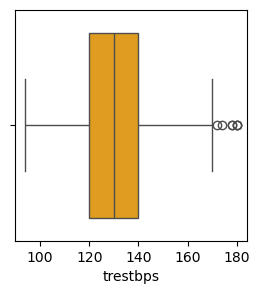

In [102]:
plt.figure(figsize = (3,3))
df_copy = df_copy[(df_copy["trestbps"] > 79) & (df_copy["trestbps"] < 184 )]
sb.boxplot(x = df_copy["trestbps"], color = "orange")

In [103]:
# Second Method
# Calculating Z_score

df_copy["testbps_Z_score"] = (df["trestbps"] - df["trestbps"].mean())/df["trestbps"].std()

In [104]:
# Now we took those value which are in the range of 3 and -3
# Trimming

df_copy = df_copy[(df_copy["testbps_Z_score"] < 3) | (df_copy["testbps_Z_score"] > -3)]

In [2]:
## Capping
# capping mean that don't remove those row which has outlier but put them in the dataset to change its value

In [105]:
highest_limit = df_copy["trestbps"].mean()+3*df_copy["trestbps"].std()
lowest_limit = df_copy["trestbps"].mean()-3*df_copy["trestbps"].std()
highest_limit
#lowest_limit

181.54939506701055

In [106]:
df["trestbps"] = np.where(df["trestbps"] > highest_limit, highest_limit,
                 np.where(df["trestbps"] < lowest_limit, lowest_limit,
                 df["trestbps"]))

<Axes: xlabel='trestbps'>

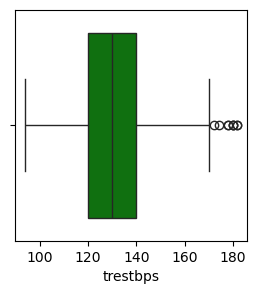

In [109]:
plt.figure(figsize = (3,3))
sb.boxplot(x = df["trestbps"], color = "green")

In [107]:
df.shape

(303, 14)

In [22]:
df_copy.shape

(301, 12)

## 2: IQR Method:
In IQR we have to use the following variables for removing outlier
#### 1: Maximum: 
it is the maximum values of the dataset
#### 2: Minimum:
it is the minimum values of the dataset
#### 3: Q1:
The first quartile of the data, i.e., to say 25% of the data lies between minimum and Q1.
#### 4: Q2 or Median:
The Median or third Quartile
#### 5: Q3: 
The third quartile of the data, i.e., to say 75% of the data lies between minimum and Q3.

IQR = Q3 - Q1

Lower Bound: (Q1 - 1.5 * IQR)

Upper Bound: (Q3 + 1.5 * IQR)

<Axes: xlabel='oldpeak'>

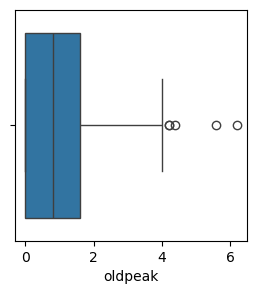

In [111]:
plt.figure(figsize = (3,3))
sb.boxplot(x = df_copy["oldpeak"])

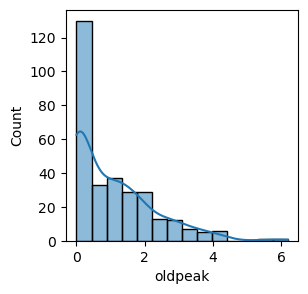

In [116]:
plt.figure(figsize = (3,3))
sb.histplot(df["oldpeak"], kde = True)
plt.show()

In [117]:
# Find IQR
# 25% Percentile
First_Quantile = df_copy["oldpeak"].quantile(0.25)
# 75% Percentile
Third_Quantile = df_copy["oldpeak"].quantile(0.75)

In [118]:
Third_Quantile

1.6

In [119]:
First_Quantile

0.0

In [120]:
IQR = Third_Quantile-First_Quantile
IQR

1.6

In [121]:
Lower_limit =  First_Quantile - 1.5 * IQR
Lower_limit

-2.4000000000000004

In [122]:
upper_limit = Third_Quantile + 1.5 * IQR
upper_limit

4.0

### Finding Outlier

In [123]:
df_copy["oldpeak"] > upper_limit

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: oldpeak, Length: 301, dtype: bool

C:\Users\Mohsin\AppData\Local\Temp\ipykernel_23768\3338016329.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df["oldpeak"] < upper_limit)]


<Axes: xlabel='oldpeak'>

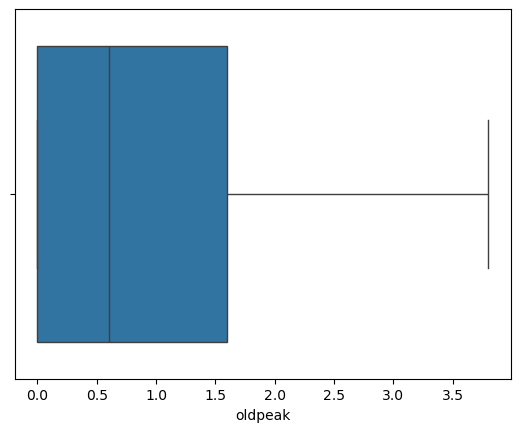

In [124]:
df_copy = df_copy[(df["oldpeak"] < upper_limit)]
sb.boxplot(x = df_copy["oldpeak"])

In [126]:
# Using Z_score
oldpeak_Hlimit = df_copy["oldpeak"].mean()+3*df_copy["oldpeak"].std()
oldpeak_Llimit =  df_copy["oldpeak"].mean()-3*df_copy["oldpeak"].std()
oldpeak_Hlimit, oldpeak_Llimit

(3.9751284058237797, -2.081250854803372)

In [127]:
# In IQR method detect all outlier and z_score detect two outlier
df_copy[df["oldpeak"] > oldpeak_Hlimit]

C:\Users\Mohsin\AppData\Local\Temp\ipykernel_23768\4293701497.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy[df["oldpeak"] > oldpeak_Hlimit]


,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target,testbps_Z_score


C:\Users\Mohsin\AppData\Local\Temp\ipykernel_23768\801914414.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Z_score_df = df_copy[df["oldpeak"] < oldpeak_Hlimit]


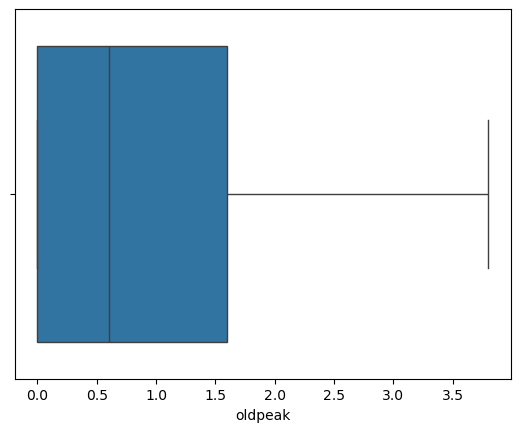

In [129]:
Z_score_df = df_copy[df["oldpeak"] < oldpeak_Hlimit]
Z_score_df
sb.boxplot(x = Z_score_df["oldpeak"])
plt.show()

In [130]:
# Now removing Outlier from THALACH
percent25 = df_copy["thalach"].quantile(0.25)
percent75 = df_copy["thalach"].quantile(0.75)
percent75

166.75

In [131]:
percent25

134.5

In [132]:
thalach_IQR = percent75-percent25
thalach_IQR

32.25

In [133]:
thalach_lower_limit = percent25-1.5*thalach_IQR
thalach_Higher_limit = percent75+1.5*thalach_IQR
thalach_lower_limit

86.125

In [134]:
thalach_Higher_limit

215.125

<Axes: ylabel='thalach'>

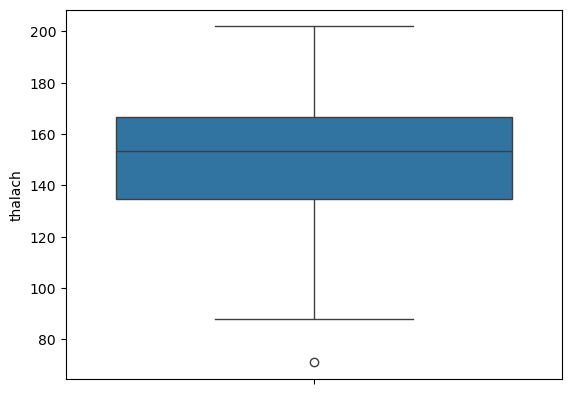

In [135]:
sb.boxplot(df_copy["thalach"])

<Axes: ylabel='thalach'>

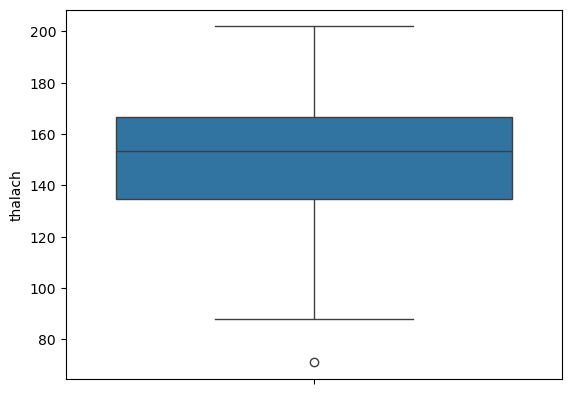

In [137]:
df_copy = df_copy[(df_copy["thalach"] > thalach_lower_limit) | (df_copy['thalach'] < thalach_Higher_limit)]
sb.boxplot(df_copy["thalach"])

In [138]:
thal_highest_limit = df_copy["thalach"].mean()+3*df_copy["thalach"].std()
thal_lowest_limit = df_copy["thalach"].mean()-3*df_copy["thalach"].std()
thal_lowest_limit

81.14338702366264

<Axes: ylabel='thalach'>

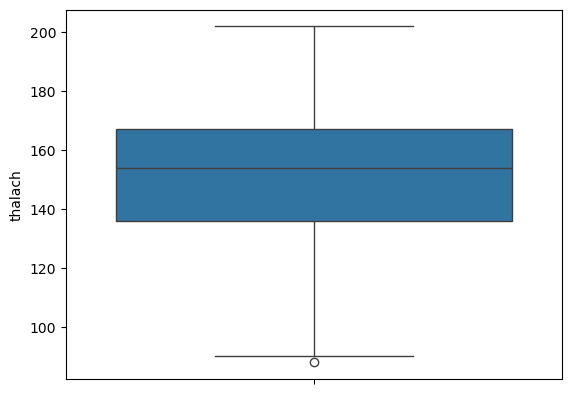

In [139]:
df_copy = df_copy[(df_copy["thalach"] > thal_lowest_limit) & (df_copy['thalach'] < thal_highest_limit)]
sb.boxplot(df_copy["thalach"])

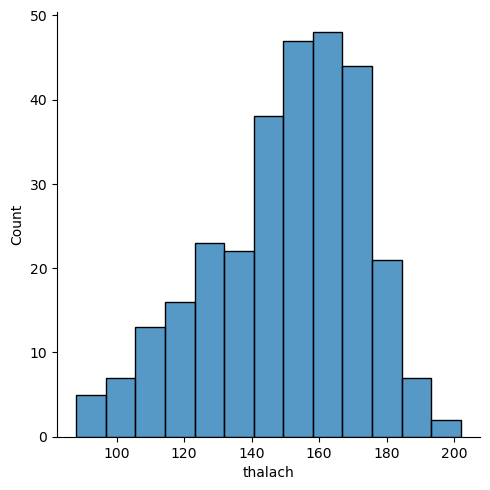

In [140]:
sb.displot(df_copy["thalach"])

In [141]:
testbps_25 = df_copy["trestbps"].quantile(0.25)
testbps_75 = df_copy["trestbps"].quantile(0.75)

In [142]:
trest_IQR = testbps_75-testbps_25
trest_IQR

20.0

In [143]:
trestbps_hlimit = testbps_75+1.5*trest_IQR
trestbps_llimit = testbps_25-1.5*trest_IQR
trestbps_hlimit

170.0

In [144]:
trestbps_llimit

90.0

In [145]:
df_copy[(df_copy["trestbps"] < trestbps_llimit) | (df_copy["trestbps"] > trestbps_hlimit)]

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target,testbps_Z_score
8,52,1,2,172,1,162,0,0.5,2,0,3,1,2.302196
110,64,0,0,180,1,154,1,0.0,2,0,2,1,2.758344
203,68,1,2,180,0,150,1,1.6,1,0,3,0,2.758344
241,59,0,0,174,1,143,1,0.0,1,0,2,0,2.416233
260,66,0,0,178,1,165,1,1.0,1,2,3,0,2.644307
266,55,0,0,180,2,117,1,3.4,1,0,2,0,2.758344


<Axes: xlabel='trestbps'>

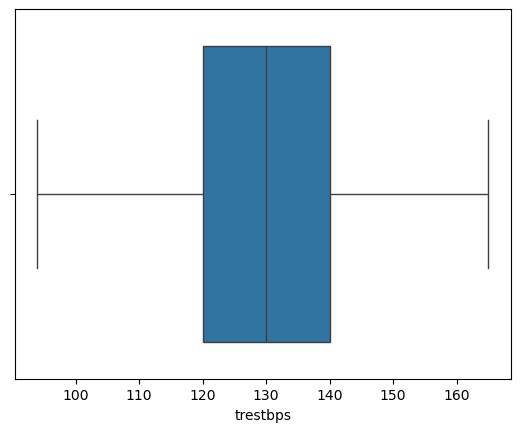

In [146]:
df_copy = df_copy[(df_copy["trestbps"] > trestbps_llimit) & (df_copy["trestbps"] < trestbps_hlimit)]
sb.boxplot(x = df_copy["trestbps"])

<Axes: >

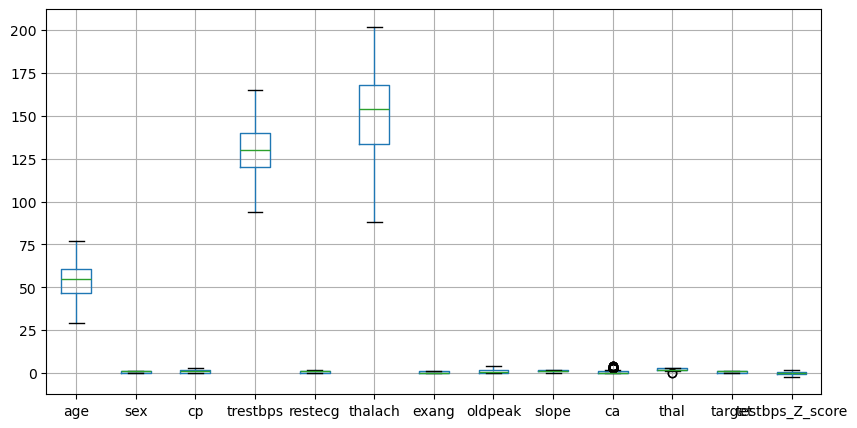

In [147]:
df_copy.boxplot(figsize = (10,5))

### Determine Distributions of Numeric Variables

In [52]:
df_copy.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'oldpeak')

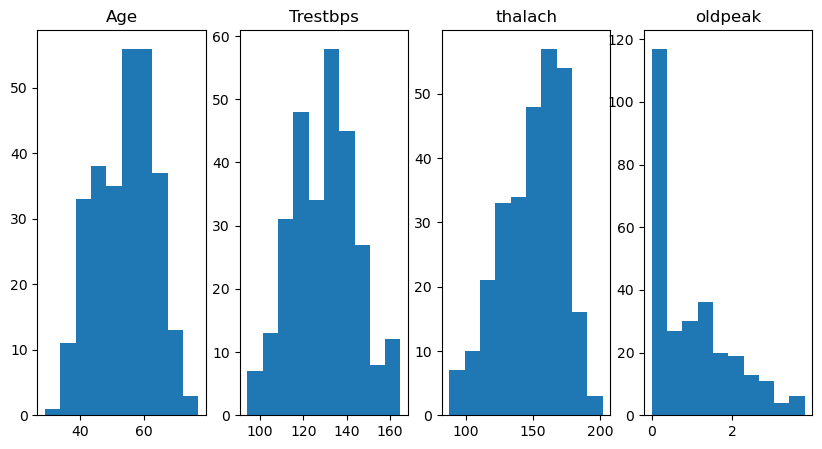

In [148]:
fig, (x1,x2, x3, x4) = plt.subplots(1, 4, figsize = (10,5))

x1.hist([df_copy.age])
x1.set_title("Age")

x2.hist([df_copy.trestbps])
x2.set_title("Trestbps")

x3.hist([df_copy.thalach])
x3.set_title("thalach")

x4.hist([df_copy.oldpeak])
x4.set_title("oldpeak")


### Skewness
Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images.

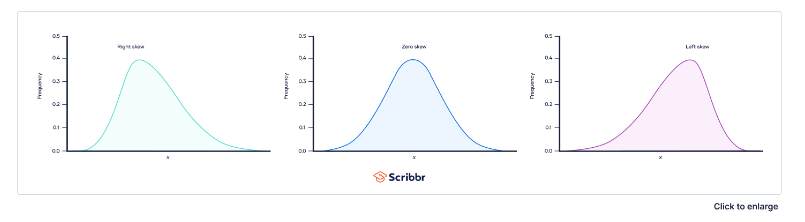

### What is zero skew or Normal Disrtibution?
When a distribution has zero skew, it is symmetrical. Its left and right sides are mirror images.

Normal distributions have zero skew

### What is right skew (positive skew)?
A right-skewed distribution is longer on the right side of its peak than on its left. Right skew is also referred to as positive skew.

### What is left skew (negative skew)?
A left-skewed distribution is longer on the left side of its peak than on its right. In other words, a left-skewed distribution has a long tail on its left side. Left skew is also referred to as negative skew.



In [149]:
df_copy[["age", "trestbps","thalach", "oldpeak"]].agg(["skew"]).transpose()

,skew
age,-0.133492
trestbps,0.116536
thalach,-0.501741
oldpeak,0.894260


If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

The other three are symmetrical and oldpeak is Asymetric

### Symmetric and Asymmetric
Symmetric data is observed when the values of variables appear at regular frequencies or intervals around the mean. Asymmetric data, on the other hand, may have skewness or noise such that the data appears at irregular or haphazard intervals.

### Transformation Operation on Unsymmetric Data

In [150]:
# Now i have to remove the Asymetric or Skewness value from data
df_copy["old_peak_log"] = np.log(df_copy["oldpeak"])
df_copy["old_peak_sqr"] = np.sqrt(df_copy["oldpeak"])

C:\Users\Mohsin\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
df_copy.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old_peak_log,old_peak_sqr
0,63,1,3,145,0,150,0,2.3,0,0,1,1,0.832909,1.516575
1,37,1,2,130,1,187,0,3.5,0,0,2,1,1.252763,1.870829
2,41,0,1,130,0,172,0,1.4,2,0,2,1,0.336472,1.183216
3,56,1,1,120,1,178,0,0.8,2,0,2,1,-0.223144,0.894427
4,57,0,0,120,1,163,1,0.6,2,0,2,1,-0.510826,0.774597


In [151]:
#df_copy.skew(axis = 1)
df_copy[["oldpeak", "old_peak_log", "old_peak_sqr"]].agg(["skew"]).transpose()

C:\Users\Mohsin\anaconda3\lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


,skew
oldpeak,0.894260
old_peak_log,NaN
old_peak_sqr,0.074174


Text(0.5, 1.0, 'old_peak_sqr')

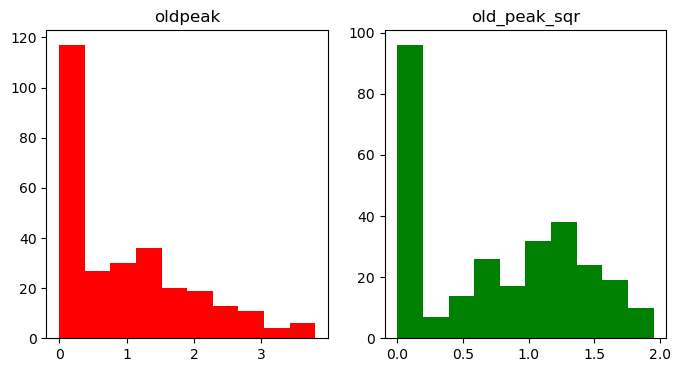

In [154]:
fig, (y1,y2) = plt.subplots(1, 2, figsize = (8,4))

y1.hist([df_copy.oldpeak], color = "red")
y1.set_title("oldpeak")

y2.hist([df_copy.old_peak_sqr] , color = "green")
y2.set_title("old_peak_sqr")


In [155]:
df_copy.drop(["oldpeak", "old_peak_log"], axis = 1, inplace = True)

In [156]:
df_copy.head()

,age,sex,cp,trestbps,restecg,thalach,exang,slope,ca,thal,target,testbps_Z_score,old_peak_sqr
0,63,1,3,145,0,150,0,0,0,1,1,0.762694,1.516575
1,37,1,2,130,1,187,0,0,0,2,1,-0.092585,1.870829
2,41,0,1,130,0,172,0,2,0,2,1,-0.092585,1.183216
3,56,1,1,120,1,178,0,2,0,2,1,-0.662770,0.894427
4,57,0,0,120,1,163,1,2,0,2,1,-0.662770,0.774597


In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130.0,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130.0,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120.0,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120.0,354,0,1,163,1,0.6,2,0,2,1


In [61]:
df_copy["thal"].value_counts()

2    162
3    103
1     16
0      2
Name: thal, dtype: int64

In [62]:
df_copy["ca"].value_counts()

0    164
1     64
2     34
3     16
4      5
Name: ca, dtype: int64

### Feature Engineering Apply one Hot Encoding

In [157]:
df_copy1 = df_copy.copy()

### Using Dumies variable

In [158]:
df_copy1 = pd.get_dummies(df_copy1, columns = ["cp","restecg","thal","ca"])

### Using Sklearn

In [159]:
from sklearn.preprocessing import OneHotEncoder

In [160]:
ohe = OneHotEncoder
ohe

sklearn.preprocessing._encoders.OneHotEncoder

In [161]:
df_copy1.head()

,age,sex,trestbps,thalach,exang,slope,target,testbps_Z_score,old_peak_sqr,cp_0,...,restecg_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,150,0,0,1,0.762694,1.516575,False,...,False,False,True,False,False,True,False,False,False,False
1,37,1,130,187,0,0,1,-0.092585,1.870829,False,...,False,False,False,True,False,True,False,False,False,False
2,41,0,130,172,0,2,1,-0.092585,1.183216,False,...,False,False,False,True,False,True,False,False,False,False
3,56,1,120,178,0,2,1,-0.662770,0.894427,False,...,False,False,False,True,False,True,False,False,False,False
4,57,0,120,163,1,2,1,-0.662770,0.774597,True,...,False,False,False,True,False,True,False,False,False,False


In [162]:
df_copy1[["cp","restecg","thal","ca"]] = ohe.fit_transform(df_copy1[["cp","restecg","thal","ca"]])

KeyError: "None of [Index(['cp', 'restecg', 'thal', 'ca'], dtype='object')] are in the [columns]"

### Categorical variable

In [69]:
categorical_var = df_copy[["cp","restecg","slope", "ca", "thal"]]

In [70]:
categorical_var1 = categorical_var.copy()

In [71]:
dumies = pd.get_dummies(categorical_var1, columns = ["cp","restecg","slope", "ca", "thal"])
dumies

,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
299,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1


### Feature Scaling With the RobustScaler Method

In [72]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

In [73]:
df_copy2 = df_copy1.copy()

In [74]:
df_copy2[["age","thalach","trestbps"]] = rbs.fit_transform(df_copy2[["age","thalach","trestbps"]])

In [75]:
df_copy2

,age,sex,trestbps,thalach,exang,slope,target,old_peak_sqr,cp_0,cp_1,...,restecg_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,0.571429,1,0.75,-0.115942,0,0,1,1.516575,0,0,...,0,0,1,0,0,1,0,0,0,0
1,-1.285714,1,0.00,0.956522,0,0,1,1.870829,0,0,...,0,0,0,1,0,1,0,0,0,0
2,-1.000000,0,0.00,0.521739,0,2,1,1.183216,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0.071429,1,-0.50,0.695652,0,2,1,0.894427,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0.142857,0,-0.50,0.260870,1,2,1,0.774597,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.142857,0,0.50,-0.898551,1,1,0,0.447214,1,0,...,0,0,0,0,1,1,0,0,0,0
299,-0.714286,1,-1.00,-0.637681,0,1,0,1.095445,0,0,...,0,0,0,0,1,1,0,0,0,0
300,0.928571,1,0.70,-0.376812,0,1,0,1.843909,1,0,...,0,0,0,0,1,0,0,1,0,0
301,0.142857,1,0.00,-1.130435,1,1,0,1.095445,1,0,...,0,0,0,0,1,0,1,0,0,0


In [76]:
df_copy1[["age","thalach","trestbps"]] = rbs.fit_transform(df_copy1[["age","thalach","trestbps"]])

### Seperating Data into Test and Traning set

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
df_copy2

,age,sex,trestbps,thalach,exang,slope,target,old_peak_sqr,cp_0,cp_1,...,restecg_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,0.571429,1,0.75,-0.115942,0,0,1,1.516575,0,0,...,0,0,1,0,0,1,0,0,0,0
1,-1.285714,1,0.00,0.956522,0,0,1,1.870829,0,0,...,0,0,0,1,0,1,0,0,0,0
2,-1.000000,0,0.00,0.521739,0,2,1,1.183216,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0.071429,1,-0.50,0.695652,0,2,1,0.894427,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0.142857,0,-0.50,0.260870,1,2,1,0.774597,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.142857,0,0.50,-0.898551,1,1,0,0.447214,1,0,...,0,0,0,0,1,1,0,0,0,0
299,-0.714286,1,-1.00,-0.637681,0,1,0,1.095445,0,0,...,0,0,0,0,1,1,0,0,0,0
300,0.928571,1,0.70,-0.376812,0,1,0,1.843909,1,0,...,0,0,0,0,1,0,0,1,0,0
301,0.142857,1,0.00,-1.130435,1,1,0,1.095445,1,0,...,0,0,0,0,1,0,1,0,0,0


In [79]:
X = df_copy2.drop(["target"], axis = 1)
Y = df_copy2[["target"]]

In [80]:
# "Random state" is used to give the same result every time , which make the code reproducible.
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 10)

In [81]:
print(f"xtrain: {xtrain.shape[0]}")
print(f"xtest: {xtest.shape[0]}")
print(f"ytrain: {ytrain.shape[0]}")
print(f"ytest: {ytest.shape[0]}")

xtrain: 226
xtest: 57
ytrain: 226
ytest: 57


## Modeling

### 1: Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
LR = LogisticRegression()
LR

LogisticRegression()

In [84]:
LR.fit(xtrain,ytrain)

C:\Users\Mohsin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [85]:
ypred = LR.predict(xtest)
ypred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [86]:
ytest.head()

,target
197,0
302,0
168,0
116,1
48,1


In [87]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytest,ypred)

Text(33.0, 0.5, 'Predicted')

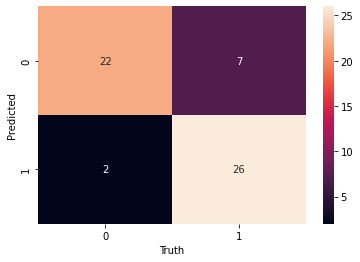

In [88]:
sb.heatmap(CM, annot= True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [89]:
print("Model Accuracy Score = ",LR.score(xtrain,ytrain))

Model Accuracy Score =  0.8761061946902655
